## Import relevant libraries

In [1]:
import pandas as pd
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

## Read data

In [3]:
data = pd.read_excel('Data_Skiresorts_Final.xlsx')
df = data.copy()
df.head()

,Skiresort_ID,Bergfex_ID,Ort,PLZ,Unnamed: 4,Höhendifferenz in,Min Höhe in,Max Höhe in m,Pisten_km,blaue_Piste,...,schwarze_Piste,Anzahl_Bahnen,Preis in CHF,Preis in EUR,Kanton_Kuerzel,SPRACHCODE,Geo Shape,Breitengrad,Längengrad,2000er_Schwelle
0,1,154,Unterbach,3857,Brandalp/Ginals Unterbach Unterbach,1213,1230,2443,19.0,10.0,...,3.0,7,52.0,53.0,BE,1,"{""coordinates"":[[[8.089758501236219,46.7278423...",46.737816,8.118977,Über 2000 Meter
1,2,1,Adelboden,3715,Adelboden Adelboden Adelboden,940,1260,2200,86.0,46.0,...,6.0,25,70.0,71.0,BE,1,"{""coordinates"":[[[7.556297221810153,46.4136636...",46.473621,7.555155,Über 2000 Meter
2,3,135,Scuol,7550,Motta Naluns Scuol Scuol,1535,1250,2785,70.0,27.0,...,11.0,10,67.0,68.0,GR,1,"{""coordinates"":[[[10.337667606548692,46.651644...",46.734561,10.326322,Über 2000 Meter
3,4,137,Samnaun,7562,Silvretta Arena Ischgl/Samnaun Samnaun,1512,1360,2872,239.0,47.0,...,49.0,41,67.0,67.0,GR,1,"{""coordinates"":[[[10.391389969430705,46.942032...",46.963293,10.402297,Über 2000 Meter
4,5,26,Verbier,1936,4 Vallees Verbier/La Tzoumaz/Nendaz/Veysonnaz...,2509,821,3330,412.0,107.0,...,103.0,67,82.0,83.0,VS,2,"{""coordinates"":[[[7.279137318615009,46.0968681...",46.100790,7.229655,Über 2000 Meter


## Transform data

Print columns

In [4]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'Ort', 'PLZ', 'Unnamed: 4',
       'Höhendifferenz in', 'Min Höhe in', 'Max Höhe in m', 'Pisten_km',
       'blaue_Piste', 'rote_Piste', 'schwarze_Piste', 'Anzahl_Bahnen',
       'Preis in CHF', 'Preis in EUR', 'Kanton_Kuerzel', 'SPRACHCODE',
       'Geo Shape', 'Breitengrad', 'Längengrad', '2000er_Schwelle'],
      dtype='object')

Rename column

In [15]:
df.rename(columns={'Unnamed: 4':'Skiresort','Kanton_Kuerzel': 'Kanton', '2000er_Schwelle':'2000er Schwelle' }, inplace=True)

Assign values to two new columns

In [16]:
df.loc[(df['Max Höhe in m'] > 1999), 'Über 2000'] = 1
df.loc[(df['Max Höhe in m'] < 2000), 'Über 2000'] = 0
df.loc[(df['Max Höhe in m'] > 1999), 'Unter 2000'] = 0
df.loc[(df['Max Höhe in m'] < 2000), 'Unter 2000'] = 1


## Create Pie chart

Sum values within two columns

In [17]:
df_sum_höhe = df[['Unter 2000', 'Über 2000']].sum()
df_sum_höhe

Unter 2000    255.0
Über 2000     100.0
dtype: float64

Build pie chart 

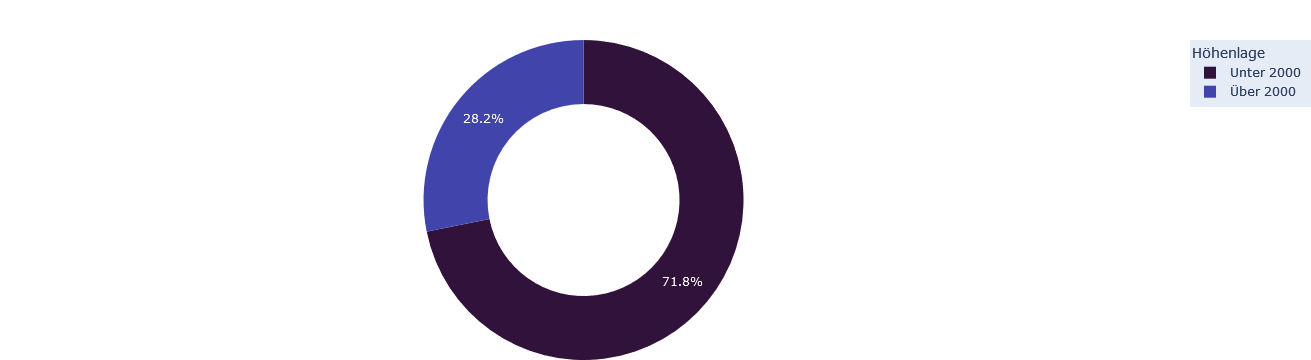

In [101]:
fig_pie = px.pie(df_sum_höhe, 
                 values=df_sum_höhe, 
                 names = df_sum_höhe.index, 
                 hole=.6,  
                 color_discrete_sequence=px.colors.sequential.Turbo
                )

fig_pie.update_layout(height = 300,
                      margin={"r":0,"t":40,"l":0,"b":0},
                      showlegend = True,
                      legend=dict(title="Höhenlage",))

fig_pie.update_layout(legend=dict(
    bgcolor = 'rgb(229,236,246)'))

fig_pie.show()

Save it as html file

In [102]:
fig_pie.write_html('Pie_Chart.html')

## Create Bar chart

Create dataframe

In [9]:
df_Kanton_Höhe = df.groupby('Kanton')['Über 2000','Unter 2000'].sum().sort_values(['Über 2000'],ascending=False).reset_index()
df_Kanton_Höhe.head(5)

C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Kanton,Über 2000,Unter 2000
0,VS,33.0,12.0
1,GR,33.0,28.0
2,BE,12.0,60.0
3,SG,5.0,20.0
4,VD,4.0,17.0


Create chart


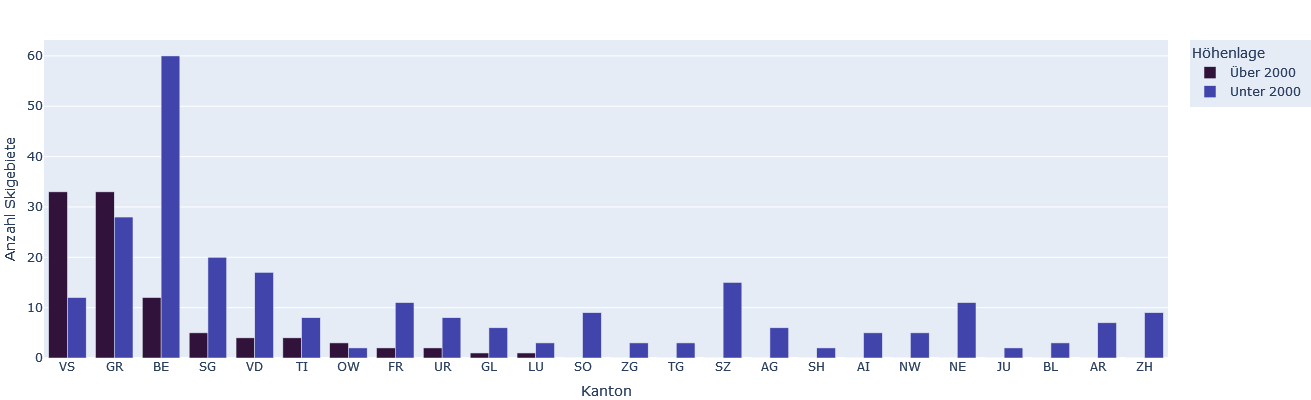

In [106]:
fig_bar = px.bar(df_Kanton_Höhe, 
                 x='Kanton', 
                 y = ["Über 2000","Unter 2000"],
                 height=400,
                 barmode='group',
                 labels={'Kanton':'Kanton', 'value': 'Anzahl Skigebiete'},
                 color_discrete_sequence=px.colors.sequential.Turbo
)

fig_bar.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                      showlegend = True,
                      legend=dict(title="Höhenlage",bgcolor = 'rgb(229,236,246)')
                     )

fig_bar.show()

Save it as html file

In [108]:
fig_bar.write_html('Bar_Plot_Höhe.html')

# Create Maps

## PX.scatter

Map with px.scatter function from plotly

In [19]:
df.columns

Index(['Skiresort_ID', 'Bergfex_ID', 'Ort', 'PLZ', 'Skiresort',
       'Höhendifferenz in', 'Min Höhe in', 'Max Höhe in m', 'Pisten_km',
       'blaue_Piste', 'rote_Piste', 'schwarze_Piste', 'Anzahl_Bahnen',
       'Preis in CHF', 'Preis in EUR', 'Kanton', 'SPRACHCODE', 'Geo Shape',
       'Breitengrad', 'Längengrad', '2000er Schwelle', 'Über 2000',
       'Unter 2000'],
      dtype='object')

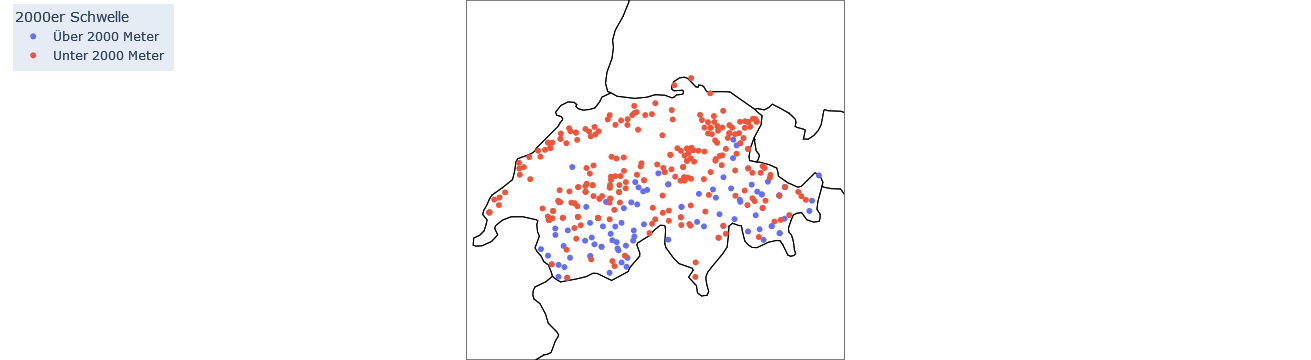

In [107]:
fig_standard_all = px.scatter_geo(df,
                    lat=df.Breitengrad,
                    lon=df.Längengrad,
                    color = df['2000er Schwelle'],
                    hover_name="Skiresort"
                                 )
fig_standard_all.update_layout(
    geo_scope='europe',
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend = True,
    legend=dict(yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.01,
                bgcolor = 'rgb(229,236,246)')
)

fig_standard_all.update_geos(fitbounds="locations",
                             visible=False, 
                             resolution=50,
                             showcountries=True, 
                             countrycolor="Black",)

fig_standard_all.show()

Save it as a html file

In [104]:
fig_standard_all.write_html('Map_Switzerland_Standard.html')

## scatter_mapbox

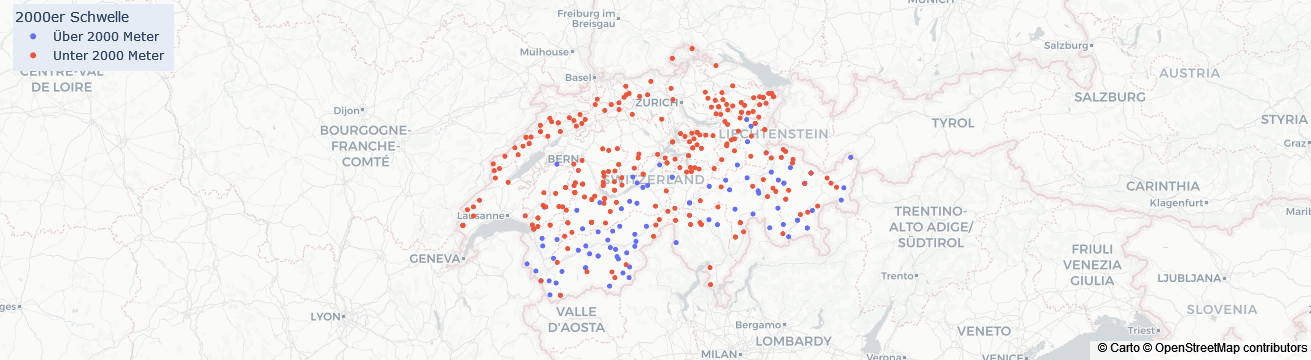

In [90]:
fig_scatter = px.scatter_mapbox(df, 
                             lon = df.Längengrad, 
                             lat = df.Breitengrad,
                             zoom = 6,
                             color = df['2000er Schwelle'],
                             hover_name="Skiresort",
)

fig_scatter.update_layout(showlegend = True,
                          legend=dict(
                          yanchor="top",
                          y=0.99,
                          xanchor="left",
                          x=0.01,
                          bgcolor = 'rgb(229,236,246)'),
                          margin={"r":0,"t":0,"l":0,"b":0},
                          mapbox_style = 'carto-positron')
                             
fig_scatter.show()

In [86]:
fig_scatter.write_html('Map_Switzerland_scatter_mapbox.html')